<a href="https://colab.research.google.com/github/HerinePamela/Notebook/blob/main/denoise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries for loading of the dataset

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

LOADING THE MNIST **DATASET**

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
v_img = x_test[:7000]
x_test = x_test[7000:]

In [ ]:
#  Data pre-processing
v_img = v_img.astype('float32')/255
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

v_img = v_img[..., tf.newaxis]
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# adding noise to images
import numpy as np

noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0,scale = 1.0,size = x_train.shape)
v_img_noisy = v_img  + noise_factor * np.random.normal(loc = 0.0,scale = 1.0,size = v_img .shape)
x_test_noisy = x_test  + noise_factor * np.random.normal(loc = 0.0,scale = 1.0,size = x_test .shape)

# maximum pixel value for the images may exceed 1 so we clip the images
x_train_noisy = np.clip(x_train_noisy,0.,1.)
v_img_noisy = np.clip(v_img_noisy,0.,1.)
x_test_noisy  = np.clip(x_test_noisy ,0.,1.)

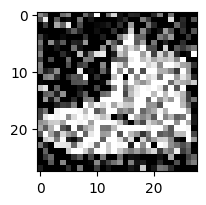

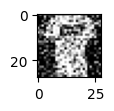

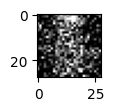

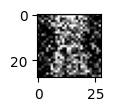

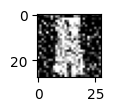

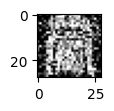

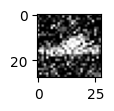

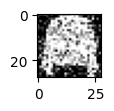

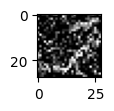

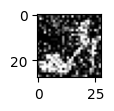

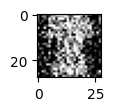

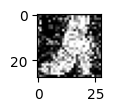

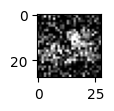

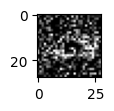

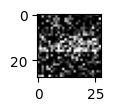

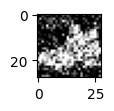

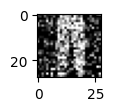

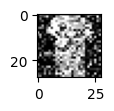

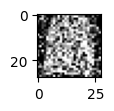

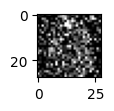

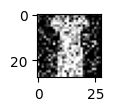

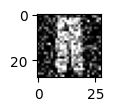

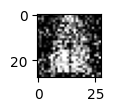

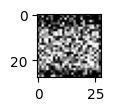

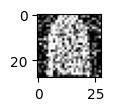

In [ ]:
# plotting the noisy images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(25):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(tf.squeeze(x_train_noisy[i]))
  plt.gray()
  plt.show()

In [ ]:
# Defining Noise2Self denoiser model

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
class Noise2SelfDenoiser(tf.keras.Model):
  def __init__(self):
    super(Noise2SelfDenoiser, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(512, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(512, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(256, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Noise2SelfDenoiser()

In [ ]:
# compiling the model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# training the model
history1 = autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                shuffle=True,
                batch_size=256,
                validation_split=0.7)

Epoch 1/5
71/71 [==============================] - 2452s 35s/step - loss: 0.0347 - accuracy: 0.5013 - val_loss: 0.0081 - val_accuracy: 0.5092
Epoch 2/5
71/71 [==============================] - 2292s 32s/step - loss: 0.0051 - accuracy: 0.5110 - val_loss: 0.0041 - val_accuracy: 0.5096
Epoch 3/5
71/71 [==============================] - 2357s 33s/step - loss: 0.0026 - accuracy: 0.5111 - val_loss: 0.0018 - val_accuracy: 0.5097
Epoch 4/5
71/71 [==============================] - 2363s 33s/step - loss: 0.0017 - accuracy: 0.5112 - val_loss: 0.0012 - val_accuracy: 0.5097
Epoch 5/5
71/71 [==============================] - 2356s 33s/step - loss: 0.0012 - accuracy: 0.5112 - val_loss: 9.5355e-04 - val_accuracy: 0.5097


In [ ]:
# denoising test images
denoised_images = autoencoder.predict(x_test_noisy)

94/94 [==============================] - 79s 841ms/step


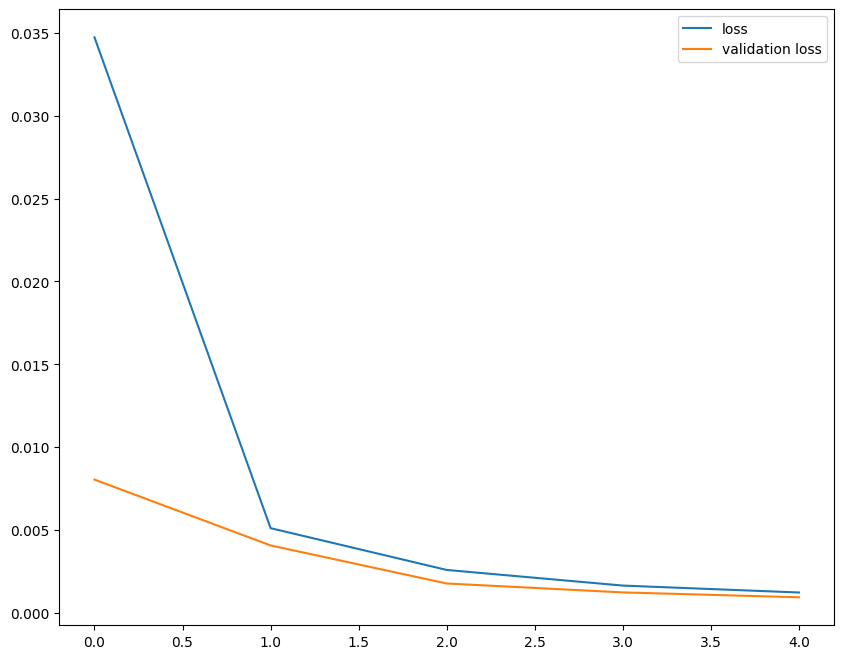

In [ ]:
# plotting loss curve
plt.figure(figsize = (10,8))

plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label = 'validation loss')
plt.legend()

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.encoder(x_test_noisy).numpy()

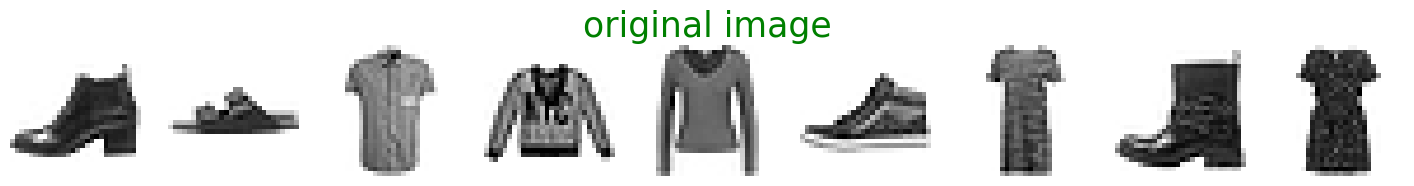

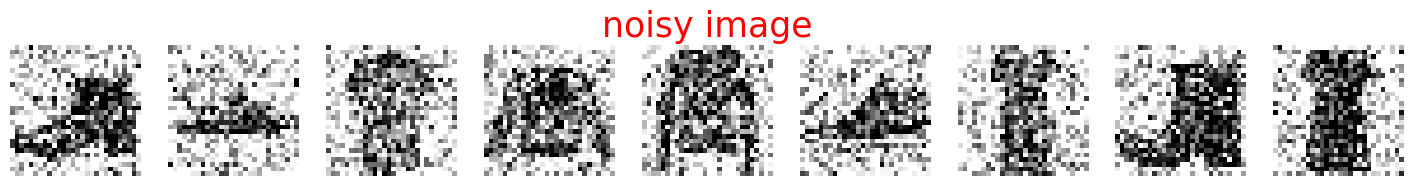

<ipython-input-44-d29dbbe7ea06>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9,9,i)


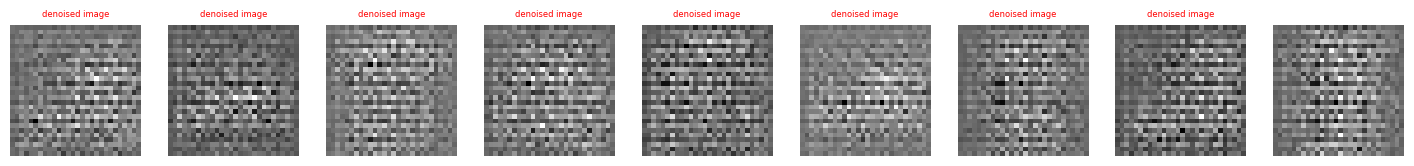

In [ ]:
# plotting; original, noised and denoised images

plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('original image', fontsize = 25, color = 'Green')
    plt.imshow(x_test[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
    plt.axis('off')
    plt.savefig('original_images.png')
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('noisy image', fontsize = 25, color = 'red')
    plt.subplot(9,9,i)
    plt.imshow(x_test_noisy[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
    plt.axis('off')
    plt.savefig('noisy_images.png')
plt.show()

# Visualize denoised images
plt.figure(figsize=(18, 18))
for i in range(10, 19):
    plt.title('denoised image', fontsize = 6, color = 'red')
    plt.subplot(9,9,i)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap= plt.cm.binary)
    plt.axis('off')
plt.savefig('denoised_images.png')
plt.show()